In [216]:
#PRINT LISTS OF ASSEMBLY METRICS FOR RAW AND QC ASSEMBLIES
#BE SURE TO ADD PATH TO EXCEL FILE
#QUAST reports generated in KBase were transferred into Excel 
#Metrics were listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
import numpy as np
  
#List sheetnames
xls = pd.ExcelFile(#r'#PATH/Supplemental_Table_1_QUAST_Summary_Tables_qc_raw.xlsx')
#print(xls.sheet_names)
#['9117.5_assemblies', '10158.8_assemblies','11263.1_assemblies', '11306.3_assemblies',
#'11306.1_assemblies', '11260.6_assemblies', '11260.5_assemblies', '9053.2_assemblies',
#'9672.8_assemblies', '9053.4_assemblies', '9053.3_assemblies', '9053.5_assemblies',
#'9108.2_assemblies', '10186.3_assemblies', '7333.1_assemblies', '9117.8_assemblies',
#'10158.6_assemblies', '9117.7_assemblies', '9117.6_assemblies', '10186.4_assemblies',
#'9108.1_assemblies', '9117.4_assemblies', '9041.8_assemblies']

#Make a dictionary of dataframes
# d = {} makes an empty dictionary
# for loop goes through each sheetname and adds the dataframe to the dictionary
# index_col = 0 makes the 'Statistics without reference' column the index
d = {}
for sheet in xls.sheet_names:
    d[f'{sheet}']= pd.read_excel(xls,sheet_name=sheet,index_col=0)

#Merge dataframes side by side (axis = 1)
#.reset_indexdrop=True removes the index column, which is the same for each dataframe
merged_df = d['9117.5_assemblies'].reset_index(drop=False)
for sheet in xls.sheet_names[1:]:
    merged_df = merged_df.reset_index(drop=True).merge(d[sheet].reset_index(drop=True), left_index=True, right_index=True)

#Replace index name from QUAST
merged_df = merged_df.rename(columns={'Statistics without reference':'#'})
merged_df = merged_df.set_index(['#'])

#Drop the last 3 rows that have 0 values because there's no mismatches
merged_df.drop(merged_df.tail(3).index, inplace = True) 

#Transpose dataframe
merged_df = merged_df.transpose()

#Separate index and df column and make new column name Reads
merged_df.reset_index(inplace=True)
merged_df.rename(columns = {'index':'Reads'}, inplace = True)
#print(merged_df)

#Filter qc files
qc_df = merged_df[merged_df['Reads'].str.contains('QC')]
#print(qc_df)

#Print lists for qc files
#The # of total contigs is the same as the # of 1k+ because that was the limit used for assembly
print("qc_reads =", qc_df['Reads'].tolist())
print("qc_total_contigs =", qc_df['# contigs'].tolist())
#print("qc_1k_contigs =", qc_df['# contigs (>= 1000 bp)'].tolist())
print("qc_10k_contigs =", qc_df['# contigs (>= 10000 bp)'].tolist())
print("qc_100k_contigs =", qc_df['# contigs (>= 100000 bp)'].tolist())
print("qc_largest_contig =", qc_df['Largest contig'].tolist())
print("qc_total_length =", qc_df['Total length'].tolist())
#print("qc_1k_tot_len =", qc_df['Total length (>= 1000 bp)'].tolist())
#print("qc_10k_tot_len =", qc_df['Total length (>= 10000 bp)'].tolist())
#print("qc_100k_tot_len =", qc_df['Total length (>= 100000 bp)'].tolist())
#print("qc_N50 =", qc_df['N50'].tolist())
#print("qc_N75 =", qc_df['N75'].tolist())
#print("qc_L50 =", qc_df['L50'].tolist())
#print("qc_L75 =", qc_df['L75'].tolist())
print("qc_GC_percent =", qc_df['GC (%)'].tolist())

#Filter raw files
#~ means the opposite of whatever command
raw_df = merged_df[~merged_df['Reads'].str.contains('QC')]
#print(raw_df)

#Print lists for raw files
#The # of total contigs is the same as the # of 1k+ because that was the limit used for assembly
print("raw_reads =", raw_df['Reads'].tolist())
print("raw_total_contigs =", raw_df['# contigs'].tolist())
#print("raw_1k_contigs =", raw_df['# contigs (>= 1000 bp)'].tolist())
print("raw_10k_contigs =", raw_df['# contigs (>= 10000 bp)'].tolist())
print("raw_100k_contigs =", raw_df['# contigs (>= 100000 bp)'].tolist())
print("raw_largest_contig =", raw_df['Largest contig'].tolist())
print("raw_total_length =", raw_df['Total length'].tolist())
#print("raw_1k_tot_len =", raw_df['Total length (>= 1000 bp)'].tolist())
#print("raw_10k_tot_len =", raw_df['Total length (>= 10000 bp)'].tolist())
#print("raw_100k_tot_len =", raw_df['Total length (>= 100000 bp)'].tolist())
#print("raw_N50 =", raw_df['N50'].tolist())
#print("raw_N75 =", raw_df['N75'].tolist())
#print("raw_L50 =", raw_df['L50'].tolist())
#print("raw_L75 =", raw_df['L75'].tolist())
print("raw_GC_percent =", raw_df['GC (%)'].tolist())



qc_reads = ['9117.5.QC.MEGAHIT.assembly', '10158.8.QC.MEGAHIT.assembly', '11263.1.QC.MEGAHIT.assembly', '11306.3.QC.MEGAHIT.assembly', '11306.1.QC.MEGAHIT.assembly', '11260.6.QC.MEGAHIT.assembly', '11260.5.QC.MEGAHIT.assembly', '9053.2.QC.MEGAHIT.assembly', '9672.8.QC.MEGAHIT.assembly', '9053.4.QC.MEGAHIT.assembly', '9053.3.QC.MEGAHIT.assembly', '9053.5.QC.MEGAHIT.assembly', '9108.2.QC.MEGAHIT.assembly', '10186.3.QC.MEGAHIT.assembly', '7333.1.QC.MEGAHIT.assembly', '9117.8.QC.MEGAHIT.assembly', '10158.6.QC.MEGAHIT.assembly', '9117.7.QC.MEGAHIT.assembly', '9117.6.QC.MEGAHIT.assembly', '10186.4.QC.MEGAHIT.assembly', '9108.1.QC.MEGAHIT.assembly', '9117.4.QC.MEGAHIT.assembly', '9041.8.QC.MEGAHIT.assembly']
qc_total_contigs = [1177673.0, 351143.0, 1290706.0, 1020207.0, 492752.0, 1031110.0, 992335.0, 1206733.0, 1081516.0, 1047224.0, 1175033.0, 714009.0, 1199339.0, 1026124.0, 748848.0, 788426.0, 1000991.0, 1127638.0, 1104718.0, 1118259.0, 514301.0, 1060948.0, 701661.0]
qc_10k_contigs = [7566.0

In [21]:
#PRINT A LIST OF ALL AND 'GOOD QUALITY' BIN COUNTS FOR EACH BINNING APPLICATION AND MINIMUM CONTIG LENGTH
#BE SURE TO ADD PATH TO EXCEL FILE
#Binning applications included MetaBAT2 and MaxBin2
#Minimum contig length included 2500 bp and 1000 bp for MaxBin2
#Each CheckM file generated in KBase was imported into Excel
#Each sheet is one CheckM file, and 
#Each sheetname contains the beginning of the JGI IMG fastq file ID and method or min contig length
#Bins were counted and listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r'#PATH/Supplemental_Table_2_CheckM_Summary_Tables_MaxBin2_contig_len_comparison', on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#PATH/Supplemental_Table_2_CheckM_Summary_Tables_MaxBin2_contig_len_comparison, sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Reorder columns of dataframe
combined_df=combined_df.reindex(columns= ['Sheetname','Bin Name', 'Marker Lineage', '# Genomes', 
                                          '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 
                                          'Completeness', 'Contamination'])

#Count the number of bins generated for each trimming and decon method
#combined_df['Sheetname'] refers to the column 'Sheetname' in the df
#value_counts() counts the rows for unique values in the specified 'Sheetname' column
#[combined_df['Sheetname'].unique()] preserves the original order the unique values appear in the df column
#.tolist() puts the counts in a list format
print("bins =", combined_df['Sheetname'].value_counts()[combined_df['Sheetname'].unique()].tolist())
allbins = combined_df['Sheetname'].value_counts()[combined_df['Sheetname'].unique()].tolist()

#print list of sheetnames
print("reads =", sheetnames)

#Remove bins that have less than 70% completeness
combined_df.drop(combined_df[combined_df['Completeness'] <= 70].index, inplace = True)

#Remove bins that have greater than 10% contamination
combined_df.drop(combined_df[combined_df['Contamination'] >= 10].index, inplace = True)

#Count the number of bins generated for each trimming and decon method
#combined_df['Sheetname'] refers to the column 'Sheetname' in the df
#value_counts() counts the rows for unique values in the specified 'Sheetname' column
#[combined_df['Sheetname'].unique()] preserves the original order the unique values appear in the df column
#.tolist() puts the counts in a list format
print("goodbins =", combined_df['Sheetname'].value_counts()[combined_df['Sheetname'].unique()].tolist())
goodbins = combined_df['Sheetname'].value_counts()[combined_df['Sheetname'].unique()].tolist()

#print list of sheetnames
print("reads =", sheetnames)

#calculate and print low quality bins
lowqualbins = [allbins - goodbins for allbins, goodbins in zip(allbins, goodbins)]
print("lowqualbins =", lowqualbins)

bins = [70, 86, 87, 68, 95, 84, 92, 89, 89, 91, 91, 85, 255, 285, 264, 249, 277, 267]
reads = ['9117.4_raw_MetaBAT2', '9053.2_raw_MetaBAT2', '9672.8_raw_MetaBAT2', '9117.4_qc_MetaBAT2', '9053.2_qc_MetaBAT2', '9672.8_qc_MetaBAT2', '9117.4_raw_2500', '9053.2_raw_2500', '9672.8_raw_2500', '9117.4_qc_2500', '9053.2_qc_2500', '9672.8_qc_2500', '9117.4_raw_1000', '9053.2_raw_1000', '9672.8_raw_1000', '9117.4_qc_1000', '9053.2_qc_1000', '9672.8_qc_1000']
goodbins = [17, 20, 20, 17, 22, 21, 11, 8, 5, 13, 9, 7, 10, 12, 10, 10, 10, 6]
reads = ['9117.4_raw_MetaBAT2', '9053.2_raw_MetaBAT2', '9672.8_raw_MetaBAT2', '9117.4_qc_MetaBAT2', '9053.2_qc_MetaBAT2', '9672.8_qc_MetaBAT2', '9117.4_raw_2500', '9053.2_raw_2500', '9672.8_raw_2500', '9117.4_qc_2500', '9053.2_qc_2500', '9672.8_qc_2500', '9117.4_raw_1000', '9053.2_raw_1000', '9672.8_raw_1000', '9117.4_qc_1000', '9053.2_qc_1000', '9672.8_qc_1000']
lowqualbins = [53, 66, 67, 51, 73, 63, 81, 81, 84, 78, 82, 78, 245, 273, 254, 239, 267, 261]


In [189]:
#PRINT THE BINNING METRICS OF ALL MAGS FROM RAW AND QC ASSEMBLIES
#BE SURE TO ADD PATH TO EXCEL FILE
#Each sheet is one CheckM file
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r"#PATH/Supplemental_Table_3_CheckM_Summary_Tables_qc_raw.xlsx", on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#"#PATH/Supplemental_Table_3_CheckM_Summary_Tables_qc_raw.xlsx", sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Add a column to the dataframe called 'Multi-copy' with combined_df['Multi-copy'] = row_value
#.loc[:,['1','2'...]] means return these columns
#axis = 1 means operating along the row, whereas 0 would mean operating along the column
#sum is the operation
combined_df['Multi-Copy'] = combined_df.loc[:,['2','3','4','5+']].sum(axis=1)

#Create a column 'Trim' for raw or fq reads
combined_df['Trim'] = combined_df['Sheetname'].str.partition('_')[2]

#Create a column 'MixGroup' for raw or fq reads
combined_df['Mix Group'] = combined_df['Sheetname'].str.partition('_')[0]

#print(combined_df)

#Reorder columns of dataframe
combined_df=combined_df.reindex(columns= ['Sheetname', 'Mix Group', 'Trim', 'Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Multi-Copy', 'Completeness', 'Contamination'])
combined_df.reset_index()
#print(combined_df)

#combined_df.set_index(['Sheetname'], inplace=True)
print("Mix_Group =", combined_df.iloc[:,1].unique().tolist())

#Filter raw files
raw_df = combined_df.loc[combined_df['Trim'] == 'raw']
#print(raw_df)

#Filter qc files
qc_df = combined_df.loc[combined_df['Trim'] == 'qc']
#print(qc_df)

#Group rows
#Calculate the counts, mean and medians for each group of bins
#Round means to two decimal places
#Make Sheetname a column for unique
#Make Sheetname an index for groupby function
raw_df.reset_index(drop=False)
print("Raw_Reads =", raw_df.iloc[:,0].unique().tolist())
print("Raw_Bin_Counts =", raw_df['Sheetname'].value_counts()[raw_df['Sheetname'].unique()].tolist())
raw_df.set_index(['Sheetname'], inplace=True)
print("Raw_Mean_Completeness =", raw_df['Completeness'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Mean_Contamination =", raw_df['Contamination'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Mean_Single_Copy =", raw_df['1'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Mean_Multi_Copy =", raw_df['Multi-Copy'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Median_Completeness =", raw_df['Completeness'].groupby('Sheetname').median().round(decimals=2).tolist())
print("Raw_Median_Contamination =", raw_df['Contamination'].groupby('Sheetname').median().round(decimals=2).tolist())
print("Raw_Median_Single_Copy =", raw_df['1'].groupby('Sheetname').median().round(decimals=2).tolist())
print("Raw_Median_Multi_Copy =", raw_df['Multi-Copy'].groupby('Sheetname').median().round(decimals=2).tolist())
qc_df.reset_index(drop=False)
print("QC_Reads =", qc_df.iloc[:,0].unique().tolist())
print("QC_Bin_Counts =", qc_df['Sheetname'].value_counts()[qc_df['Sheetname'].unique()].tolist())
qc_df.set_index(['Sheetname'], inplace=True)
print("QC_Mean_Completeness =", qc_df['Completeness'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Mean_Contamination =", qc_df['Contamination'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Mean_Single_Copy =", qc_df['1'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Mean_Multi_Copy =", qc_df['Multi-Copy'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Median_Completeness =", qc_df['Completeness'].groupby('Sheetname').median().round(decimals=2).tolist())
print("QC_Median_Contamination =", qc_df['Contamination'].groupby('Sheetname').median().round(decimals=2).tolist())
print("QC_Median_Single_Copy =", qc_df['1'].groupby('Sheetname').median().round(decimals=2).tolist())
print("QC_Median_Multi_Copy =", qc_df['Multi-Copy'].groupby('Sheetname').median().round(decimals=2).tolist())



Mix_Group = ['9117.5', '10158.8', '11263.1', '11306.3', '11306.1', '11260.6', '11260.5', '9108.1', '9053.2', '9672.8', '9108.2', '9053.4', '9053.3', '9117.4', '9117.6', '9117.7', '9117.8', '10158.6', '10186.3', '10186.4', '7331.1', '9053.5', '9041.8']
Raw_Reads = ['9117.5_raw', '10158.8_raw', '11263.1_raw', '11306.3_raw', '11306.1_raw', '11260.6_raw', '11260.5_raw', '9108.1_raw', '9053.2_raw', '9672.8_raw', '9108.2_raw', '9053.4_raw', '9053.3_raw', '9117.4_raw', '9117.6_raw', '9117.7_raw', '9117.8_raw', '10158.6_raw', '10186.3_raw', '10186.4_raw', '7331.1_raw', '9053.5_raw', '9041.8_raw']
Raw_Bin_Counts = [65, 47, 139, 99, 55, 90, 115, 38, 86, 87, 69, 71, 95, 70, 62, 95, 65, 78, 85, 109, 45, 49, 52]
Raw_Mean_Completeness = [58.83, 45.96, 51.28, 56.54, 56.55, 63.26, 52.23, 58.47, 54.69, 53.7, 58.18, 60.32, 62.41, 65.52, 52.14, 50.97, 56.26, 57.0, 65.39, 54.89, 53.78, 53.56, 52.81]
Raw_Mean_Contamination = [69.63, 24.03, 67.13, 60.4, 53.21, 81.43, 55.06, 35.14, 54.71, 74.62, 54.7, 76.81,

In [185]:
#PRINT DISTRIBUTIONS OF CONTAMINATION PERCENTAGES OF MAGS FROM RAW AND QC ASSEMBLIES
#BE SURE TO ADD PATH TO EXCEL FILE
#These are not averages by assembly, they are all MAG contamination percentages
#Contamination percentages were listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r"#PATH/Supplemental_Table_3_CheckM_Summary_Tables_qc_raw.xlsx", on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#"#PATH/Supplemental_Table_3_CheckM_Summary_Tables_qc_raw.xlsx", sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Add a column to the dataframe called 'Multi-copy' with combined_df['Multi-copy'] = row_value
#.loc[:,['1','2'...]] means return these columns
#axis = 1 means operating along the row, whereas 0 would mean operating along the column
#sum is the operation
combined_df['Multi-Copy'] = combined_df.loc[:,['2','3','4','5+']].sum(axis=1)

#Reorder columns of dataframe
combined_df=combined_df.reindex(columns= ['Sheetname', 'Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Multi-Copy', 'Completeness', 'Contamination'])
combined_df.reset_index()
#print(combined_df)

#Extract contamination data from dataframe
combined_df.set_index(['Sheetname'], inplace=True)
contamination_df = combined_df.groupby('Sheetname')['Contamination'].apply(lambda group_series: group_series.tolist()).reset_index()

#use these commands to print lists as an array to transfer to KBase
#contamination_df.reset_index()
#contamination_df.to_numpy()

In [104]:
#PRINT BINNING METRICS OF GOOD MAGS FOR RAW AND QC ASSEMBLIES
#BE SURE TO ADD PATH TO EXCEL FILE
#Each CheckM file generated in KBase was imported into Excel
#Bins were counted and listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r"#PATH/Supplemental_Table_3_CheckM_Summary_Tables_qc_raw.xlsx", on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#"#PATH/Supplemental_Table_3_CheckM_Summary_Tables_qc_raw.xlsx", sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Add a column to the dataframe called 'Multi-copy' with combined_df['Multi-copy'] = row_value
#.loc[:,['1','2'...]] means return these columns
#axis = 1 means operating along the row, whereas 0 would mean operating along the column
#sum is the operation
combined_df['Multi-Copy'] = combined_df.loc[:,['2','3','4','5+']].sum(axis=1)

#Create a column 'Trim' for raw or fq reads
combined_df['Trim'] = combined_df['Sheetname'].str.partition('_')[2]
#print(combined_df)

#Reorder columns of dataframe
combined_df=combined_df.reindex(columns= ['Sheetname', 'Trim', 'Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Multi-Copy', 'Completeness', 'Contamination'])

#Remove bins that have less than 70% completeness
combined_df.drop(combined_df[combined_df['Completeness'] <= 70].index, inplace = True)

#Remove bins that have greater than 10% contamination
combined_df.drop(combined_df[combined_df['Contamination'] >= 10].index, inplace = True)

#Reset index
combined_df.reset_index()
#print(combined_df)

#Filter raw files
raw_df = combined_df.loc[combined_df['Trim'] == 'raw']
#print(raw_df)

#Filter qc files
qc_df = combined_df.loc[combined_df['Trim'] == 'qc']
#print(qc_df)

#Group rows
#Calculate the counts, mean and medians for each group of bins
#Round means to two decimal places
#Make Sheetname a column for unique
#Make Sheetname an index for groupby function
raw_df.reset_index(drop=False)
print("Raw_Reads =", raw_df.iloc[:,0].unique().tolist())
print("Raw_Bin_Counts =", raw_df['Sheetname'].value_counts()[raw_df['Sheetname'].unique()].tolist())
raw_df.set_index(['Sheetname'], inplace=True)
print("Raw_Mean_Completeness =", raw_df['Completeness'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Mean_Contamination =", raw_df['Contamination'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Mean_Single_Copy =", raw_df['1'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Mean_Multi_Copy =", raw_df['Multi-Copy'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("Raw_Median_Completeness =", raw_df['Completeness'].groupby('Sheetname').median().round(decimals=2).tolist())
print("Raw_Median_Contamination =", raw_df['Contamination'].groupby('Sheetname').median().round(decimals=2).tolist())
print("Raw_Median_Single_Copy =", raw_df['1'].groupby('Sheetname').median().round(decimals=2).tolist())
print("Raw_Median_Multi_Copy =", raw_df['Multi-Copy'].groupby('Sheetname').median().round(decimals=2).tolist())
qc_df.reset_index(drop=False)
print("QC_Reads =", qc_df.iloc[:,0].unique().tolist())
print("QC_Bin_Counts =", qc_df['Sheetname'].value_counts()[qc_df['Sheetname'].unique()].tolist())
qc_df.set_index(['Sheetname'], inplace=True)
print("QC_Mean_Completeness =", qc_df['Completeness'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Mean_Contamination =", qc_df['Contamination'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Mean_Single_Copy =", qc_df['1'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Mean_Multi_Copy =", qc_df['Multi-Copy'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("QC_Median_Completeness =", qc_df['Completeness'].groupby('Sheetname').median().round(decimals=2).tolist())
print("QC_Median_Contamination =", qc_df['Contamination'].groupby('Sheetname').median().round(decimals=2).tolist())
print("QC_Median_Single_Copy =", qc_df['1'].groupby('Sheetname').median().round(decimals=2).tolist())
print("QC_Median_Multi_Copy =", qc_df['Multi-Copy'].groupby('Sheetname').median().round(decimals=2).tolist())



Raw_Reads = ['9117.5_raw', '10158.8_raw', '11263.1_raw', '11306.3_raw', '11306.1_raw', '11260.6_raw', '11260.5_raw', '9108.1_raw', '9053.2_raw', '9672.8_raw', '9108.2_raw', '9053.4_raw', '9053.3_raw', '9117.4_raw', '9117.6_raw', '9117.7_raw', '9117.8_raw', '10158.6_raw', '10186.3_raw', '10186.4_raw', '7331.1_raw', '9053.5_raw', '9041.8_raw']
Raw_Bin_Counts = [15, 4, 23, 19, 14, 25, 29, 9, 20, 20, 18, 18, 23, 17, 10, 22, 16, 21, 18, 20, 9, 9, 14]
Raw_Mean_Completeness = [83.85, 84.79, 89.19, 87.14, 90.06, 87.41, 90.7, 86.6, 87.55, 85.4, 87.31, 86.68, 86.18, 84.94, 87.02, 88.92, 88.11, 87.12, 87.24, 89.3, 87.42, 87.22, 86.64]
Raw_Mean_Contamination = [4.23, 3.37, 3.57, 4.4, 3.62, 4.4, 4.56, 3.0, 4.05, 4.32, 4.53, 3.9, 4.48, 4.17, 2.86, 2.87, 3.85, 3.4, 3.63, 4.37, 4.63, 3.91, 4.25]
Raw_Mean_Single_Copy = [209.71, 144.0, 272.61, 212.5, 257.45, 243.44, 232.3, 193.21, 247.84, 214.56, 241.57, 217.55, 202.04, 168.33, 224.33, 212.11, 255.0, 215.41, 236.67, 221.3, 216.41, 225.0, 224.45]
Raw_Mea

In [296]:
#PRINT PERCENTAGE OF ANNOTATE PROTEIN-CODING GENES(COG)
#BE SURE TO ADD PATH TO EXCEL FILE
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import sys
import numpy
import pandas as pd 
from scipy import stats
  
# Import the excel file and call it xls_file
xls = pd.ExcelFile(#'#PATH/Supplemental_Table_4_COG_Summary_Tables.xlsx')

# Load the xls file's Sheet1 as a dataframe
raw_df = xls.parse('raw')
qc_df = xls.parse('qc')

#convert dataframes to numpy arrays for transfer to Kbase
#numpy.set_printoptions(threshold=sys.maxsize)
#raw_ar = raw_df.to_numpy()
#qc_ar = qc_df.to_numpy()

#Remove comment out to print numpy arrays for transfer to Kbase
##raw_ar
qc_ar

#Use this command to list column values for pd.DataFrame command
#df_column_values = raw_df.columns.values.tolist()
#print(df_column_values)

#convert numpy arrays back to pandas dataframes for statistical testing
##raw_df = pd.DataFrame(raw_ar, columns = ['COG', 'D', 'M', 'N', 'O', 'T', 'U', 'V', 'W', 'Z', 'A', 'B', 'J', 
##  'K', 'L', 'C', 'E', 'F', 'G', 'H', 'I', 'P', 'Q', 'R', 'S'])
##qc_df = pd.DataFrame(qc_ar, columns = ['COG', 'D', 'M', 'N', 'O', 'T', 'U', 'V', 'W', 'Z', 'A', 'B', 'J', 
##  'K', 'L', 'C', 'E', 'F', 'G', 'H', 'I', 'P', 'Q', 'R', 'S'])

#Loop through matching columns in raw and qc dataframes
#[1:] Skip the first column which contains annotated genome names
#perform paired t-test on matching column data
#round p-value of t-test to four decimal places
#append p-value (test[1]) to list t
##t=[]
##for i in raw_df.columns[1:]:
##    test = stats.ttest_rel(raw_df[i], qc_df[i])
##    t.append(round(test[1],4))


#list column values starting from second column
##df_column_values = raw_df.columns[1:].values.tolist()
#print(df_column_values)

#make dictionary with p-values and column values
##d = dict(zip(t,df_column_values))
#print(d)

#sort dictionary by p-values low to high
##sorted_d = sorted(d.items(), key=lambda x: x[0], reverse=False)
##print(sorted_d)

array([['bin.064.fasta_9053.2.QC.assembly.RAST', 0.01384, 0.07483,
        0.01538, 0.05638, 0.07022, 0.01486, 0.01691, 0.0, 0.0, 0.0,
        0.00051, 0.0979, 0.04716, 0.04408, 0.05843, 0.07791, 0.03178,
        0.07586, 0.06151, 0.03895, 0.05894, 0.0082, 0.07022, 0.06509],
       ['bin.019.fasta_9053.2.QC.assembly.RAST', 0.01328, 0.08688,
        0.01605, 0.06364, 0.04317, 0.0166, 0.03099, 0.0, 0.00166, 0.0,
        0.00111, 0.10625, 0.0487, 0.05091, 0.05313, 0.07748, 0.02656,
        0.06253, 0.057, 0.03929, 0.06364, 0.00443, 0.07692, 0.05091],
       ['bin.084.fasta_9053.2.QC.assembly.RAST', 0.01528, 0.07642,
        0.02063, 0.04815, 0.09629, 0.01223, 0.03172, 0.0, 0.00038, 0.0,
        0.00115, 0.07031, 0.05159, 0.03936, 0.05961, 0.09553, 0.02369,
        0.04127, 0.05694, 0.04241, 0.04624, 0.01528, 0.09171, 0.06343],
       ['bin.016.fasta_9053.2.QC.assembly.RAST', 0.00939, 0.09256,
        0.00469, 0.04594, 0.06942, 0.00872, 0.04091, 0.0, 0.00034, 0.0,
        0.00034, 0.06304,

In [300]:
#PRINT PERCENTAGE OF ANNOTATE PROTEIN-CODING GENES(PFAM)
#BE SURE TO ADD PATH TO EXCEL FILE
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import sys
import numpy
import pandas as pd 
from scipy import stats
  
# Import the excel file and call it xls_file
xls = pd.ExcelFile(#'#PATH/Supplemental_Table_5_PFAM_Summary_Tables.xlsx')

# Load the xls file's Sheet1 as a dataframe
raw_df = xls.parse('raw')
qc_df = xls.parse('qc')

#convert dataframes to numpy arrays for transfer to Kbase
numpy.set_printoptions(threshold=sys.maxsize)
raw_ar = raw_df.to_numpy()
qc_ar = qc_df.to_numpy()

#Remove comment out to print numpy arrays for transfer to Kbase
#raw_ar
qc_ar

#Use this command to list column values for pd.DataFrame command
#df_column_values = raw_df.columns.values.tolist()
#print(df_column_values)

#convert numpy arrays back to pandas dataframes for statistical testing
##raw_df = pd.DataFrame(raw_ar, columns = ['PFAM', 'CL0004', 'CL0007', 'CL0010', 'CL0013', 'CL0014', 'CL0015',
##  'CL0016', 'CL0020', 'CL0021', 'CL0023', 'CL0025', 'CL0026', 'CL0027', 'CL0028', 'CL0029', 'CL0030', 'CL0031', 
##  'CL0032', 'CL0034', 'CL0035', 'CL0036', 'CL0037', 'CL0039', 'CL0040', 'CL0042', 'CL0043', 'CL0044', 'CL0045', 
##  'CL0046', 'CL0048', 'CL0050', 'CL0051', 'CL0052', 'CL0057', 'CL0058', 'CL0059', 'CL0060', 'CL0061', 'CL0062', 
##  'CL0063', 'CL0064', 'CL0066', 'CL0067', 'CL0070', 'CL0071', 'CL0072', 'CL0076', 'CL0077', 'CL0078', 'CL0080', 
##  'CL0082', 'CL0085', 'CL0086', 'CL0087', 'CL0088', 'CL0089', 'CL0090', 'CL0091', 'CL0093', 'CL0094', 'CL0095', 
##  'CL0098', 'CL0099', 'CL0103', 'CL0104', 'CL0105', 'CL0106', 'CL0107', 'CL0108', 'CL0109', 'CL0110', 'CL0111', 
##  'CL0112', 'CL0113', 'CL0115', 'CL0116', 'CL0118', 'CL0122', 'CL0123', 'CL0124', 'CL0125', 'CL0126', 'CL0127', 
##  'CL0128', 'CL0129', 'CL0130', 'CL0131', 'CL0132', 'CL0136', 'CL0137', 'CL0139', 'CL0141', 'CL0142', 'CL0143', 
##  'CL0144', 'CL0149', 'CL0151', 'CL0153', 'CL0157', 'CL0158', 'CL0159', 'CL0160', 'CL0161', 'CL0163', 'CL0165', 
##  'CL0167', 'CL0168', 'CL0170', 'CL0171', 'CL0172', 'CL0173', 'CL0174', 'CL0175', 'CL0177', 'CL0178', 'CL0179', 
##  'CL0181', 'CL0182', 'CL0183', 'CL0184', 'CL0186', 'CL0187', 'CL0189', 'CL0190', 'CL0191', 'CL0192', 'CL0193', 
##  'CL0196', 'CL0197', 'CL0198', 'CL0199', 'CL0202', 'CL0204', 'CL0205', 'CL0206', 'CL0207', 'CL0209', 'CL0218', 
##  'CL0219', 'CL0220', 'CL0221', 'CL0222', 'CL0223', 'CL0224', 'CL0225', 'CL0227', 'CL0228', 'CL0229', 'CL0230', 
##  'CL0231', 'CL0232', 'CL0233', 'CL0234', 'CL0235', 'CL0236', 'CL0237', 'CL0238', 'CL0240', 'CL0241', 'CL0243', 
##  'CL0244', 'CL0245', 'CL0246', 'CL0247', 'CL0248', 'CL0251', 'CL0252', 'CL0254', 'CL0255', 'CL0256', 'CL0257', 
##  'CL0258', 'CL0259', 'CL0260', 'CL0261', 'CL0262', 'CL0263', 'CL0264', 'CL0265', 'CL0266', 'CL0267', 'CL0268', 
##  'CL0269', 'CL0270', 'CL0273', 'CL0275', 'CL0276', 'CL0277', 'CL0278', 'CL0279', 'CL0280', 'CL0283', 'CL0286', 
##  'CL0287', 'CL0288', 'CL0289', 'CL0290', 'CL0291', 'CL0292', 'CL0296', 'CL0297', 'CL0298', 'CL0299', 'CL0300', 
##  'CL0301', 'CL0302', 'CL0303', 'CL0304', 'CL0305', 'CL0307', 'CL0308', 'CL0310', 'CL0311', 'CL0314', 'CL0315', 
##  'CL0316', 'CL0317', 'CL0318', 'CL0319', 'CL0320', 'CL0322', 'CL0323', 'CL0325', 'CL0327', 'CL0328', 'CL0329', 
##  'CL0331', 'CL0332', 'CL0333', 'CL0334', 'CL0335', 'CL0336', 'CL0337', 'CL0339', 'CL0340', 'CL0341', 'CL0342', 
##  'CL0344', 'CL0346', 'CL0349', 'CL0350', 'CL0355', 'CL0357', 'CL0360', 'CL0364', 'CL0366', 'CL0368', 'CL0369', 
##  'CL0373', 'CL0374', 'CL0376', 'CL0377', 'CL0378', 'CL0379', 'CL0380', 'CL0381', 'CL0382', 'CL0383', 'CL0384', 
##  'CL0385', 'CL0387', 'CL0388', 'CL0392', 'CL0394', 'CL0397', 'CL0399', 'CL0401', 'CL0403', 'CL0404', 'CL0406', 
##  'CL0407', 'CL0408', 'CL0410', 'CL0413', 'CL0414', 'CL0418', 'CL0419', 'CL0421', 'CL0423', 'CL0424', 'CL0425', 
##  'CL0426', 'CL0428', 'CL0430', 'CL0431', 'CL0433', 'CL0434', 'CL0436', 'CL0437', 'CL0439', 'CL0441', 'CL0442', 
##  'CL0447', 'CL0453', 'CL0457', 'CL0458', 'CL0465', 'CL0466', 'CL0469', 'CL0470', 'CL0471', 'CL0472', 'CL0475', 
##  'CL0477', 'CL0478', 'CL0479', 'CL0481', 'CL0483', 'CL0486', 'CL0487', 'CL0488', 'CL0489', 'CL0492', 'CL0493', 
##  'CL0494', 'CL0496', 'CL0497', 'CL0498', 'CL0499', 'CL0500', 'CL0502', 'CL0503', 'CL0504', 'CL0505', 'CL0506', 
##  'CL0508', 'CL0515', 'CL0516', 'CL0517', 'CL0522', 'CL0524', 'CL0525', 'CL0526', 'CL0527', 'CL0528', 'CL0529', 
##  'CL0530', 'CL0531', 'CL0533', 'CL0534', 'CL0536', 'CL0539', 'CL0544', 'CL0548', 'CL0553', 'CL0556', 'CL0559', 
##  'CL0560', 'CL0565', 'CL0566', 'CL0569', 'CL0570', 'CL0572', 'CL0575', 'CL0578', 'CL0579', 'CL0580', 'CL0582', 
##  'CL0583'])
##qc_df = pd.DataFrame(qc_ar, columns = ['PFAM', 'CL0004', 'CL0007', 'CL0010', 'CL0013', 'CL0014', 'CL0015',
##  'CL0016', 'CL0020', 'CL0021', 'CL0023', 'CL0025', 'CL0026', 'CL0027', 'CL0028', 'CL0029', 'CL0030', 'CL0031', 
##  'CL0032', 'CL0034', 'CL0035', 'CL0036', 'CL0037', 'CL0039', 'CL0040', 'CL0042', 'CL0043', 'CL0044', 'CL0045', 
##  'CL0046', 'CL0048', 'CL0050', 'CL0051', 'CL0052', 'CL0057', 'CL0058', 'CL0059', 'CL0060', 'CL0061', 'CL0062', 
##  'CL0063', 'CL0064', 'CL0066', 'CL0067', 'CL0070', 'CL0071', 'CL0072', 'CL0076', 'CL0077', 'CL0078', 'CL0080', 
##  'CL0082', 'CL0085', 'CL0086', 'CL0087', 'CL0088', 'CL0089', 'CL0090', 'CL0091', 'CL0093', 'CL0094', 'CL0095', 
##  'CL0098', 'CL0099', 'CL0103', 'CL0104', 'CL0105', 'CL0106', 'CL0107', 'CL0108', 'CL0109', 'CL0110', 'CL0111', 
##  'CL0112', 'CL0113', 'CL0115', 'CL0116', 'CL0118', 'CL0122', 'CL0123', 'CL0124', 'CL0125', 'CL0126', 'CL0127', 
##  'CL0128', 'CL0129', 'CL0130', 'CL0131', 'CL0132', 'CL0136', 'CL0137', 'CL0139', 'CL0141', 'CL0142', 'CL0143', 
##  'CL0144', 'CL0149', 'CL0151', 'CL0153', 'CL0157', 'CL0158', 'CL0159', 'CL0160', 'CL0161', 'CL0163', 'CL0165', 
##  'CL0167', 'CL0168', 'CL0170', 'CL0171', 'CL0172', 'CL0173', 'CL0174', 'CL0175', 'CL0177', 'CL0178', 'CL0179', 
##  'CL0181', 'CL0182', 'CL0183', 'CL0184', 'CL0186', 'CL0187', 'CL0189', 'CL0190', 'CL0191', 'CL0192', 'CL0193', 
##  'CL0196', 'CL0197', 'CL0198', 'CL0199', 'CL0202', 'CL0204', 'CL0205', 'CL0206', 'CL0207', 'CL0209', 'CL0218', 
##  'CL0219', 'CL0220', 'CL0221', 'CL0222', 'CL0223', 'CL0224', 'CL0225', 'CL0227', 'CL0228', 'CL0229', 'CL0230', 
##  'CL0231', 'CL0232', 'CL0233', 'CL0234', 'CL0235', 'CL0236', 'CL0237', 'CL0238', 'CL0240', 'CL0241', 'CL0243', 
##  'CL0244', 'CL0245', 'CL0246', 'CL0247', 'CL0248', 'CL0251', 'CL0252', 'CL0254', 'CL0255', 'CL0256', 'CL0257', 
##  'CL0258', 'CL0259', 'CL0260', 'CL0261', 'CL0262', 'CL0263', 'CL0264', 'CL0265', 'CL0266', 'CL0267', 'CL0268', 
##  'CL0269', 'CL0270', 'CL0273', 'CL0275', 'CL0276', 'CL0277', 'CL0278', 'CL0279', 'CL0280', 'CL0283', 'CL0286', 
##  'CL0287', 'CL0288', 'CL0289', 'CL0290', 'CL0291', 'CL0292', 'CL0296', 'CL0297', 'CL0298', 'CL0299', 'CL0300', 
##  'CL0301', 'CL0302', 'CL0303', 'CL0304', 'CL0305', 'CL0307', 'CL0308', 'CL0310', 'CL0311', 'CL0314', 'CL0315', 
##  'CL0316', 'CL0317', 'CL0318', 'CL0319', 'CL0320', 'CL0322', 'CL0323', 'CL0325', 'CL0327', 'CL0328', 'CL0329', 
##  'CL0331', 'CL0332', 'CL0333', 'CL0334', 'CL0335', 'CL0336', 'CL0337', 'CL0339', 'CL0340', 'CL0341', 'CL0342', 
##  'CL0344', 'CL0346', 'CL0349', 'CL0350', 'CL0355', 'CL0357', 'CL0360', 'CL0364', 'CL0366', 'CL0368', 'CL0369', 
##  'CL0373', 'CL0374', 'CL0376', 'CL0377', 'CL0378', 'CL0379', 'CL0380', 'CL0381', 'CL0382', 'CL0383', 'CL0384', 
##  'CL0385', 'CL0387', 'CL0388', 'CL0392', 'CL0394', 'CL0397', 'CL0399', 'CL0401', 'CL0403', 'CL0404', 'CL0406', 
##  'CL0407', 'CL0408', 'CL0410', 'CL0413', 'CL0414', 'CL0418', 'CL0419', 'CL0421', 'CL0423', 'CL0424', 'CL0425', 
##  'CL0426', 'CL0428', 'CL0430', 'CL0431', 'CL0433', 'CL0434', 'CL0436', 'CL0437', 'CL0439', 'CL0441', 'CL0442', 
##  'CL0447', 'CL0453', 'CL0457', 'CL0458', 'CL0465', 'CL0466', 'CL0469', 'CL0470', 'CL0471', 'CL0472', 'CL0475', 
##  'CL0477', 'CL0478', 'CL0479', 'CL0481', 'CL0483', 'CL0486', 'CL0487', 'CL0488', 'CL0489', 'CL0492', 'CL0493', 
##  'CL0494', 'CL0496', 'CL0497', 'CL0498', 'CL0499', 'CL0500', 'CL0502', 'CL0503', 'CL0504', 'CL0505', 'CL0506', 
##  'CL0508', 'CL0515', 'CL0516', 'CL0517', 'CL0522', 'CL0524', 'CL0525', 'CL0526', 'CL0527', 'CL0528', 'CL0529', 
##  'CL0530', 'CL0531', 'CL0533', 'CL0534', 'CL0536', 'CL0539', 'CL0544', 'CL0548', 'CL0553', 'CL0556', 'CL0559', 
##  'CL0560', 'CL0565', 'CL0566', 'CL0569', 'CL0570', 'CL0572', 'CL0575', 'CL0578', 'CL0579', 'CL0580', 'CL0582', 
##  'CL0583'])

#Loop through matching columns in raw and qc dataframes
#[1:] Skip the first column which contains annotated genome names
#perform paired t-test on matching column data
#round p-value of t-test to four decimal places
#append p-value (test[1]) to list t
##t=[]
##for i in raw_df.columns[1:]:
##    test = stats.ttest_rel(raw_df[i], qc_df[i])
##    t.append(round(test[1],4))


#list column values starting from second column
##df_column_values = raw_df.columns[1:].values.tolist()
#print(df_column_values)

#make dictionary with p-values and column values
##d = dict(zip(t,df_column_values))
#print(d)

#sort dictionary by p-values low to high
##sorted_d = sorted(d.items(), key=lambda x: x[0], reverse=False)
##print(sorted_d)

array([['bin.064.fasta_9053.2.QC.assembly.RAST', 0.00234, 0.0, 0.0,
        0.00187, 0.00515, 0.00562, 0.00187, 0.00328, 0.00468, 0.07166,
        0.01405, 0.00047, 0.0, 0.00609, 0.00468, 0.00094, 0.0, 0.00141,
        0.00422, 0.00281, 0.02389, 0.00094, 0.01171, 0.00515, 0.00094,
        0.00047, 0.00187, 0.0, 0.00468, 0.0, 0.00281, 0.00047, 0.00047,
        0.00094, 0.01077, 0.00281, 0.00047, 0.01124, 0.00375, 0.05386,
        0.00375, 0.00094, 0.00234, 0.00141, 0.00047, 0.00422, 0.00141,
        0.00094, 0.00094, 0.00047, 0.00047, 0.00094, 0.00047, 0.00047,
        0.00375, 0.00234, 0.00047, 0.00094, 0.0, 0.00141, 0.0, 0.00281,
        0.00141, 0.00234, 0.00234, 0.00703, 0.00187, 0.00047, 0.00749,
        0.00234, 0.01311, 0.00187, 0.0, 0.01124, 0.00094, 0.00094,
        0.00281, 0.0, 0.0267, 0.00187, 0.00375, 0.00703, 0.00422,
        0.00234, 0.0, 0.0, 0.00094, 0.00047, 0.00141, 0.00562, 0.00094,
        0.0, 0.00328, 0.00937, 0.00328, 0.00094, 0.00187, 0.0, 0.0,
        0.00141, 

In [302]:
#PRINT PERCENTAGE OF ANNOTATE PROTEIN-CODING GENES(TIGRFAM)
#BE SURE TO ADD PATH TO EXCEL FILE
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import sys
import numpy
import pandas as pd 
from scipy import stats
  
# Import the excel file and call it xls_file
xls = pd.ExcelFile(#'#PATH/Supplemental_Table_6_TIGRFAM_Summary_Tables.xlsx')

# Load the xls file's Sheet1 as a dataframe
raw_df = xls.parse('raw')
qc_df = xls.parse('qc')

#convert dataframes to numpy arrays for transfer to Kbase
numpy.set_printoptions(threshold=sys.maxsize)
raw_ar = raw_df.to_numpy()
qc_ar = qc_df.to_numpy()

#Remove comment out to print numpy arrays for transfer to Kbase
#raw_ar
qc_ar

#Use this command to list column values for pd.DataFrame command
#df_column_values = raw_df.columns.values.tolist()
#print(df_column_values)

#convert numpy arrays back to pandas dataframes for statistical testing
##raw_df = pd.DataFrame(raw_ar, columns = ['TIGRFAM', 'role:11010', 'role:11020', 'role:11030', 'role:11040',
##  'role:11050', 'role:11060', 'role:12010', 'role:12020', 'role:12030', 'role:12040', 'role:12050', 'role:12070', 
##  'role:13010', 'role:13020', 'role:13030', 'role:14010', 'role:14015', 'role:14020', 'role:14025', 'role:14030', 
##  'role:14035', 'role:14040', 'role:14045', 'role:14050', 'role:14055', 'role:14060', 'role:14065', 'role:14070', 
##  'role:15010', 'role:15015', 'role:15020', 'role:15030', 'role:15040', 'role:15060', 'role:15070', 'role:17015', 
##  'role:17025', 'role:17035', 'role:17040', 'role:17049', 'role:17050', 'role:17055', 'role:17060', 'role:17065', 
##  'role:17075', 'role:17080', 'role:18010', 'role:18020', 'role:18030', 'role:18040', 'role:18050', 'role:18060', 
##  'role:18070', 'role:18080', 'role:19010', 'role:19030', 'role:19040', 'role:19050', 'role:20010', 'role:20020', 
##  'role:20030', 'role:20040', 'role:21010', 'role:21030', 'role:21040', 'role:21050', 'role:21060', 'role:21510', 
##  'role:21520', 'role:21530', 'role:21540', 'role:22010', 'role:22030', 'role:22040', 'role:22090', 'role:22570', 
##  'role:22580', 'role:23020', 'role:23030', 'role:23040', 'role:23060', 'role:24010', 'role:24015', 'role:24030', 
##  'role:24050', 'role:24060', 'role:24065', 'role:24070', 'role:24075', 'role:25020', 'role:25095', 'role:25500', 
##  'role:25510', 'role:26010', 'role:26015'])
##qc_df = pd.DataFrame(qc_ar, columns = ['TIGRFAM', 'role:11010', 'role:11020', 'role:11030', 'role:11040',
##  'role:11050', 'role:11060', 'role:12010', 'role:12020', 'role:12030', 'role:12040', 'role:12050', 'role:12070', 
##  'role:13010', 'role:13020', 'role:13030', 'role:14010', 'role:14015', 'role:14020', 'role:14025', 'role:14030', 
##  'role:14035', 'role:14040', 'role:14045', 'role:14050', 'role:14055', 'role:14060', 'role:14065', 'role:14070', 
##  'role:15010', 'role:15015', 'role:15020', 'role:15030', 'role:15040', 'role:15060', 'role:15070', 'role:17015', 
##  'role:17025', 'role:17035', 'role:17040', 'role:17049', 'role:17050', 'role:17055', 'role:17060', 'role:17065', 
##  'role:17075', 'role:17080', 'role:18010', 'role:18020', 'role:18030', 'role:18040', 'role:18050', 'role:18060', 
##  'role:18070', 'role:18080', 'role:19010', 'role:19030', 'role:19040', 'role:19050', 'role:20010', 'role:20020', 
##  'role:20030', 'role:20040', 'role:21010', 'role:21030', 'role:21040', 'role:21050', 'role:21060', 'role:21510', 
##  'role:21520', 'role:21530', 'role:21540', 'role:22010', 'role:22030', 'role:22040', 'role:22090', 'role:22570', 
##  'role:22580', 'role:23020', 'role:23030', 'role:23040', 'role:23060', 'role:24010', 'role:24015', 'role:24030', 
##  'role:24050', 'role:24060', 'role:24065', 'role:24070', 'role:24075', 'role:25020', 'role:25095', 'role:25500', 
##  'role:25510', 'role:26010', 'role:26015'])

#Loop through matching columns in raw and qc dataframes
#[1:] Skip the first column which contains annotated genome names
#perform paired t-test on matching column data
#round p-value of t-test to four decimal places
#append p-value (test[1]) to list t
##t=[]
##for i in raw_df.columns[1:]:
##    test = stats.ttest_rel(raw_df[i], qc_df[i])
##    t.append(round(test[1],4))


#list column values starting from second column
##df_column_values = raw_df.columns[1:].values.tolist()
#print(df_column_values)

#make dictionary with p-values and column values
##d = dict(zip(t,df_column_values))
#print(d)

#sort dictionary by p-values low to high
##sorted_d = sorted(d.items(), key=lambda x: x[0], reverse=False)
##print(sorted_d)

array([['bin.064.fasta_9053.2.QC.assembly.RAST', 0.01747, 0.01892,
        0.0131, 0.0131, 0.00291, 0.01164, 0.0, 0.00582, 0.01747, 0.01019,
        0.00582, 0.00146, 0.01601, 0.0, 0.00146, 0.00437, 0.00582,
        0.01747, 0.00146, 0.00873, 0.00146, 0.01019, 0.00582, 0.00728,
        0.0, 0.00728, 0.00437, 0.0, 0.00291, 0.0, 0.00291, 0.00146,
        0.00582, 0.00291, 0.0, 0.00582, 0.00728, 0.00146, 0.00291,
        0.00873, 0.00728, 0.00291, 0.00582, 0.0131, 0.00728, 0.00437,
        0.00728, 0.01456, 0.00437, 0.02038, 0.0, 0.00146, 0.00437,
        0.01019, 0.0524, 0.00291, 0.00291, 0.0, 0.00291, 0.00437,
        0.00728, 0.00582, 0.02911, 0.05386, 0.03057, 0.01747, 0.00873,
        0.03202, 0.01601, 0.00437, 0.01019, 0.00291, 0.00146, 0.04076,
        0.0, 0.0, 0.00291, 0.00146, 0.0131, 0.01747, 0.0, 0.00582,
        0.00873, 0.00291, 0.00146, 0.0, 0.00873, 0.00582, 0.0, 0.0,
        0.00146, 0.02329, 0.04658, 0.01019, 0.0],
       ['bin.019.fasta_9053.2.QC.assembly.RAST', 0.01269

In [131]:
#PRINT A LIST OF READ AND BASE COUNTS FOR EACH TRIMMING/DECON METHOD
#SCALE READ AND BASE COUNTS FOR EACH TRIMMING/DECON METHOD FOR REGRESSION ANALYSIS
#BE SURE TO ADD PATH TO EXCEL FILE
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

import numpy as np
import pandas as pd 

#Read sheet into a dataframe
df = pd.read_excel(#'#PATH/Supplemental_Table_7_BBDuk_Remaining_Reads_Bases', sheet_name='Remaining_Reads_Bases')

#Print a list of reads and bases
print("read_files =", df['Sheetname'].tolist())
print("reads =", df['Reads'].tolist())
print("bases =", df['Bases'].tolist())

#Scale reads for regression analysis
reads = np.array(df['Reads'].tolist())
tMscale = 10000000
tMreads = reads / tMscale
print("tMreads =", tMreads.tolist())

#Scale bases for regression analysis
bases = np.array(df['Bases'].tolist())
Bscale = 1000000000
Bbases = bases / Bscale
print("Bbases =", Bbases.tolist())

read_files = ['10158.6_raw', '10158.6_qc', '10158.6_trim150', '10158.6_ftrimmed', '10158.6_ktrimmed', '10158.6_atrimmed', '10158.6_aqbtrimmed', '10158.6_aqtrimmed', '10158.6_qbtrimmed', '10158.6_qtrimmed', '10158.6_bb1', '10158.6_bb2', '10158.6_bb3', '10158.6_bb4', '10158.6_bb5', '10158.6_bb6', '9117.8_raw', '9117.8_qc', '9117.8_trim150', '9117.8_ftrimmed', '9117.8_ktrimmed', '9117.8_atrimmed', '9117.8_aqbtrimmed', '9117.8_aqtrimmed', '9117.8_qbtrimmed', '9117.8_qtrimmed', '9117.8_bb1', '9117.8_bb2', '9117.8_bb3', '9117.8_bb4', '9117.8_bb5', '9117.8_bb6', '9108.2_raw', '9108.2_qc', '9108.2_trim150', '9108.2_ftrimmed', '9108.2_ktrimmed', '9108.2_atrimmed', '9108.2_aqbtrimmed', '9108.2_aqtrimmed', '9108.2_qbtrimmed', '9108.2_qtrimmed', '9108.2_bb1', '9108.2_bb2', '9108.2_bb3', '9108.2_bb4', '9108.2_bb5', '9108.2_bb6']
reads = [360129894, 352337896, 360129894, 360129894, 358983284, 359338620, 345521430, 312682706, 343282984, 306449696, 358442254, 312345964, 306156510, 353058416, 344731868

In [195]:
#PRINT THE BINNING METRICS OF ALL MAGS FROM TRIM AND DECON ASSEMBLIES
#BE SURE TO ADD PATH TO EXCEL FILE
#Each CheckM file generated in KBase was imported into Excel
#Each sheet is one CheckM file, and 
#Each sheetname contains the beginning of the JGI IMG fastq file ID and QC method code (e.g. trim150)
#Bins were counted and listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r"#PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx", on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#"#PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx", sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Add a column to the dataframe called 'Multi-copy' with combined_df['Multi-copy'] = row_value
#.loc[:,['1','2'...]] means return these columns
#axis = 1 means operating along the row, whereas 0 would mean operating along the column
#sum is the operation
combined_df['Multi-Copy'] = combined_df.loc[:,['2','3','4','5+']].sum(axis=1)

#Create a column 'MixGroup' for raw or fq reads
combined_df['Mix Group'] = combined_df['Sheetname'].str.partition('_')[0]

#print(combined_df)

#Reorder columns of dataframe
combined_df.reset_index()
combined_df=combined_df.reindex(columns= ['Sheetname', 'Mix Group', 'Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Multi-Copy', 'Completeness', 'Contamination'])

#print(combined_df)

#combined_df.set_index(['Sheetname'], inplace=True)
mixgroup_df = combined_df.drop_duplicates(subset = ['Sheetname'])
print("Mix_Group =", mixgroup_df.iloc[:,1].tolist())

#Reorder columns of dataframe
#combined_df.reset_index()
#combined_df=combined_df.reindex(columns= ['Sheetname', 'Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Multi-Copy', 'Completeness', 'Contamination'])

#Calculate the counts, mean and medians for each group of bins
#Round means to two decimal places
#Make Sheetname a column for unique
#Make Sheetname an index for groupby function
combined_df.set_index(['Sheetname'], inplace=True)
print("td_Mean_Completeness =", combined_df['Completeness'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("td_Mean_Contamination =", combined_df['Contamination'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("td_Mean_Single_Copy =", combined_df['1'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("td_Mean_Multi_Copy =", combined_df['Multi-Copy'].groupby('Sheetname').mean().round(decimals=2).tolist())

Mix_Group = ['10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '10158.6', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9117.8', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2', '9108.2']
td_Mean_Completeness = [53.86, 53.28, 56.31, 57.37, 54.68, 50.1, 58.05, 54.04, 51.16, 54.76, 51.12, 52.23, 57.52, 52.15, 58.83, 54.29, 56.66, 53.72, 57.38, 56.22, 52.7, 52.65, 55.11, 54.88, 57.48, 54.64, 53.6, 54.34, 58.18, 52.11, 56.26, 58.28, 57.17, 59.53, 56.07, 51.82, 58.95, 60.91, 56.23, 56.59, 60.48, 59.56, 56.87, 61.29, 54.39, 60.71, 53.56, 53.89]
td_Mean_Contamination = [64.8, 56.57, 63.75, 56.14, 63.41, 65.77, 68.71, 59.0, 51.31, 53.39, 53.35, 56.24, 59.82, 71.72, 69.63, 66.78,

In [142]:
#PRINT THE BINNING METRICS OF GOOD MAGS FROM TRIM AND DECON ASSEMBLIES
#BE SURE TO ADD PATH TO EXCEL FILE
#Each CheckM file generated in KBase was imported into Excel
#Each sheet is one CheckM file, and 
#Each sheetname contains the beginning of the JGI IMG fastq file ID and QC method code (e.g. trim150)
#Bins were counted and listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r"#PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx", on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#"#PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx", sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Add a column to the dataframe called 'Multi-copy' with combined_df['Multi-copy'] = row_value
#.loc[:,['1','2'...]] means return these columns
#axis = 1 means operating along the row, whereas 0 would mean operating along the column
#sum is the operation
combined_df['Multi-Copy'] = combined_df.loc[:,['2','3','4','5+']].sum(axis=1)

#Reorder columns of dataframe
combined_df.reset_index()
combined_df=combined_df.reindex(columns= ['Sheetname', 'Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Multi-Copy', 'Completeness', 'Contamination'])

#Remove bins that have less than 70% completeness
combined_df.drop(combined_df[combined_df['Completeness'] <= 70].index, inplace = True)

#Remove bins that have greater than 10% contamination
combined_df.drop(combined_df[combined_df['Contamination'] >= 10].index, inplace = True)

#Calculate the counts, mean and medians for each group of bins
#Round means to two decimal places
#Make Sheetname a column for unique
#Make Sheetname an index for groupby function
combined_df.set_index(['Sheetname'], inplace=True)
print("td_good_Mean_Completeness =", combined_df['Completeness'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("td_good_Mean_Contamination =", combined_df['Contamination'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("td_good_Mean_Single_Copy =", combined_df['1'].groupby('Sheetname').mean().round(decimals=2).tolist())
print("td_good_Mean_Multi_Copy =", combined_df['Multi-Copy'].groupby('Sheetname').mean().round(decimals=2).tolist())

td_good_Mean_Completeness = [85.98, 87.17, 86.9, 87.66, 86.64, 86.04, 85.18, 86.79, 86.35, 86.03, 88.47, 85.58, 89.46, 86.17, 83.85, 86.86, 87.51, 86.6, 87.87, 87.83, 86.62, 87.87, 87.12, 87.7, 87.06, 87.94, 87.37, 85.69, 87.28, 85.92, 88.11, 86.67, 85.99, 87.07, 86.97, 86.86, 86.75, 89.43, 86.51, 86.19, 86.17, 85.87, 86.68, 87.63, 86.26, 89.38, 87.22, 87.03]
td_good_Mean_Contamination = [5.06, 4.78, 4.28, 4.58, 3.83, 4.25, 4.66, 4.68, 4.57, 4.01, 4.01, 4.34, 4.43, 4.96, 4.23, 5.17, 3.87, 3.93, 3.27, 3.48, 4.16, 4.88, 3.89, 3.16, 4.65, 4.07, 4.41, 4.22, 4.07, 3.78, 3.85, 4.16, 3.57, 3.88, 3.56, 3.5, 3.68, 4.71, 3.46, 3.84, 3.94, 3.61, 3.5, 3.36, 3.4, 3.57, 3.91, 4.21]
td_good_Mean_Single_Copy = [237.1, 249.41, 256.4, 273.32, 238.94, 250.67, 231.0, 233.15, 231.41, 215.71, 293.6, 232.94, 272.37, 255.83, 209.71, 252.0, 251.41, 273.94, 250.12, 241.76, 229.33, 279.2, 263.89, 243.73, 252.12, 263.38, 241.0, 256.29, 247.82, 252.67, 255.0, 245.06, 218.74, 229.73, 216.53, 237.56, 214.19, 221.47,

In [133]:
#PRINT A LIST OF BIN COUNTS FOR EACH TRIMMING/DECON METHOD
#Each CheckM file generated in KBase was imported into Excel
#Each sheet is one CheckM file, and 
#Each sheetname contains the beginning of the JGI IMG fastq file ID and QC method code (e.g. trim150)
#Bins were counted and listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r'#PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx', on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#'PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx', sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Reorder columns of dataframe
combined_df=combined_df.reindex(columns= ['Sheetname','Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Completeness', 'Contamination'])

#Count the number of bins generated for each trimming and decon method
#combined_df['Sheetname'] refers to the column 'Sheetname' in the df
#value_counts() counts the rows for unique values in the specified 'Sheetname' column
#[combined_df['Sheetname'].unique()] preserves the original order the unique values appear in the df column
#.tolist() puts the counts in a list format
print("bins =", combined_df['Sheetname'].value_counts()[combined_df['Sheetname'].unique()].tolist())

#print list of sheetnames (aka read files produced by different trimming and decon methods)
print("read_files =", sheetnames)

bins = [78, 85, 82, 83, 85, 83, 82, 78, 79, 63, 90, 72, 67, 78, 85, 83, 65, 62, 64, 52, 55, 59, 59, 56, 54, 50, 62, 55, 50, 60, 61, 53, 69, 76, 74, 75, 75, 71, 73, 72, 68, 65, 74, 71, 66, 74, 74, 65]
read_files = ['10158.6_raw', '10158.6_qc', '10158.6_trim150', '10158.6_ftrim', '10158.6_ktrim', '10158.6_atrim', '10158.6_aqbtrim', '10158.6_aqtrim', '10158.6_qbtrim', '10158.6_qtrim', '10158.6_bb1', '10158.6_bb2', '10158.6_bb3', '10158.6_bb4', '10158.6_bb5', '10158.6_bb6', '9117.8_raw', '9117.8_qc', '9117.8_trim150', '9117.8_ftrim', '9117.8_ktrim', '9117.8_atrim', '9117.8_aqbtrim', '9117.8_aqtrim', '9117.8_qbtrim', '9117.8_qtrim', '9117.8_bb1', '9117.8_bb2', '9117.8_bb3', '9117.8_bb4', '9117.8_bb5', '9117.8_bb6', '9108.2_raw', '9108.2_qc', '9108.2_trim150', '9108.2_ftrim', '9108.2_ktrim', '9108.2_atrim', '9108.2_aqbtrim', '9108.2_aqtrim', '9108.2_qbtrim', '9108.2_qtrim', '9108.2_bb1', '9108.2_bb2', '9108.2_bb3', '9108.2_bb4', '9108.2_bb5', '9108.2_bb6']


In [135]:
#PRINT A LIST OF 'GOOD QUALITY' BIN COUNTS FOR EACH TRIMMING/DECON METHOD
#Each CheckM file generated in KBase was imported into Excel
#Each sheet is one CheckM file, and 
#Each sheetname contains the beginning of the JGI IMG fastq file ID and QC method code (e.g. trim150)
#Bins were counted and listed for easy transfer back into the KBase narrative for subsequent statistical analysis
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

# import packages
import xlrd
import pandas as pd 
  
#Automatically list sheetnames
xls = xlrd.open_workbook(#r'#PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx', on_demand=True)
sheetnames = xls.sheet_names()

#Read all sheets together
list_of_dfs = [pd.read_excel(#'#PATH/Supplemental_Table_8_CheckM_Summary_Tables_trim_decon.xlsx', sheet_name=sheet) for sheet in sheetnames]

# zip loops through two things at once
# so you're looking at dataframe #1 and sheetname #1
# then dataframe #2 and sheetname #2
# and assigning that sheetname as a new column in the dataframe
for dataframe, sheetname in zip(list_of_dfs, sheetnames):
  dataframe['Sheetname'] = sheetname

#Combine dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#Convert all int/numeric column names into string
combined_df.columns = combined_df.columns.map(str)

#Reorder columns of dataframe
combined_df=combined_df.reindex(columns= ['Sheetname','Bin Name', 'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1', '2', '3', '4', '5+', 'Completeness', 'Contamination'])

#Remove bins that have less than 70% completeness
combined_df.drop(combined_df[combined_df['Completeness'] <= 70].index, inplace = True)

#Remove bins that have greater than 10% contamination
combined_df.drop(combined_df[combined_df['Contamination'] >= 10].index, inplace = True)

#Count the number of bins generated for each trimming and decon method
#combined_df['Sheetname'] refers to the column 'Sheetname' in the df
#value_counts() counts the rows for unique values in the specified 'Sheetname' column
#[combined_df['Sheetname'].unique()] preserves the original order the unique values appear in the df column
#.tolist() puts the counts in a list format
print("good_bins =", combined_df['Sheetname'].value_counts()[combined_df['Sheetname'].unique()].tolist())

#print list of sheetnames (aka read files produced by different trimming and decon methods)
print("read_files =", sheetnames)



good_bins = [21, 19, 19, 14, 15, 20, 20, 17, 17, 12, 19, 16, 12, 22, 20, 17, 16, 16, 17, 17, 15, 17, 19, 15, 15, 14, 16, 16, 15, 18, 19, 16, 18, 17, 17, 16, 16, 16, 17, 17, 14, 15, 17, 15, 15, 19, 15, 17]
read_files = ['10158.6_raw', '10158.6_qc', '10158.6_trim150', '10158.6_ftrim', '10158.6_ktrim', '10158.6_atrim', '10158.6_aqbtrim', '10158.6_aqtrim', '10158.6_qbtrim', '10158.6_qtrim', '10158.6_bb1', '10158.6_bb2', '10158.6_bb3', '10158.6_bb4', '10158.6_bb5', '10158.6_bb6', '9117.8_raw', '9117.8_qc', '9117.8_trim150', '9117.8_ftrim', '9117.8_ktrim', '9117.8_atrim', '9117.8_aqbtrim', '9117.8_aqtrim', '9117.8_qbtrim', '9117.8_qtrim', '9117.8_bb1', '9117.8_bb2', '9117.8_bb3', '9117.8_bb4', '9117.8_bb5', '9117.8_bb6', '9108.2_raw', '9108.2_qc', '9108.2_trim150', '9108.2_ftrim', '9108.2_ktrim', '9108.2_atrim', '9108.2_aqbtrim', '9108.2_aqtrim', '9108.2_qbtrim', '9108.2_qtrim', '9108.2_bb1', '9108.2_bb2', '9108.2_bb3', '9108.2_bb4', '9108.2_bb5', '9108.2_bb6']


r_tMreads = [36.0129894, 17.6218972, 38.2800142, 34.9076424, 35.3037194, 37.1504476, 40.3613864, 20.7773948, 31.8428354, 30.1166938, 27.718318, 40.8492618, 39.7169858, 34.4581152, 26.9696492, 21.3309852, 39.9148934, 34.9441596, 35.690255, 35.5019026, 33.4711394, 28.2058246, 36.96984]
r_Bbases = [54.379613994, 26.609064772, 57.802821442, 52.710540024, 53.308616294, 56.097175876, 60.945693464, 31.373866148, 48.082681454, 45.1750407, 41.85466018, 61.682385318, 59.972648558, 52.031753952, 40.724170292, 32.209787652, 60.271489034, 52.765680996, 53.89228505, 53.607872926, 50.541420494, 42.590795146, 55.8244584]
q_tMreads = [35.2337896, 17.3455096, 37.8344118, 34.4439582, 35.0842802, 36.9296158, 39.9514302, 20.230118, 31.3942576, 29.4334034, 26.76452, 39.2385186, 38.7301026, 32.9266262, 26.1061886, 19.9634984, 37.3791976, 32.3312534, 34.7862974, 33.6473242, 32.6004118, 26.5787996, 34.5922186]
q_Bbases = [52.641056249, 25.947687394, 56.637294844, 51.564538249, 52.461194454, 55.300421182, 59.86

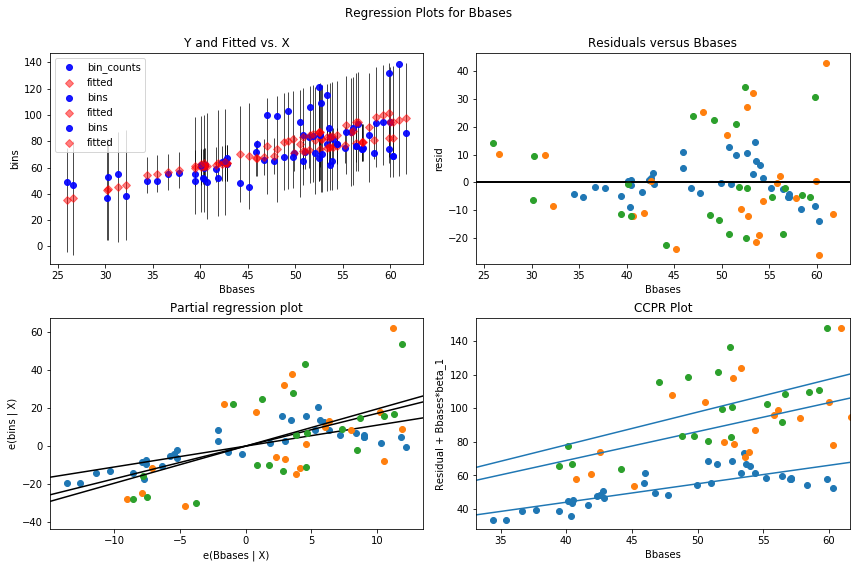

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [254]:
#PERFORM LINEAR REGRESSION WITH BIN COUNTS AND READS OR BASES
#BE SURE TO ADD PATH TO EXCEL FILE
#Jason M. Whitham 2021
#Please reference the article if you use code to publish your own research

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#data
df1 = pd.read_excel(#PATH/SoftwareTools/Kbase/Supplemental_Table_9_raw_Reads_Bases_Bins.xlsx") 
df2 = pd.read_excel(#PATH/SoftwareTools/Kbase/Supplemental_Table_10_qc_Reads_Bases_Bins.xlsx") 
#print(df2)
print('r_tMreads =', df1['tMreads'].tolist())
print('r_Bbases =', df1['Bbases'].tolist())
print('q_tMreads =', df2['tMreads'].tolist())
print('q_Bbases =', df2['Bbases'].tolist())

Bbases = [54.379613994, 52.641056249, 54.0194841, 51.498574842, 50.780358538, 53.669962132, 45.964065176, 42.845175292, 53.535374086, 45.919226343, 42.80751312, 53.311820816, 42.590795146, 40.133987396, 42.3087369, 40.334329178, 39.44260618, 41.667343504, 37.725547193, 35.427126679, 40.490156646, 36.660246851, 34.422663647, 40.446202848, 60.271489034, 56.442588376, 59.8723401, 57.078297562, 55.202040634, 58.310667004, 51.019814812, 47.762707137, 57.069909524, 49.92030233, 46.728770205, 57.037961444]
bins = [78, 85, 82, 83, 85, 83, 78, 63, 90, 72, 67, 78, 65, 61, 64, 52, 55, 59, 56, 50, 62, 55, 50, 60, 69, 76, 74, 75, 75, 71, 72, 65, 74, 71, 66, 74]

#create dataset
df = pd.DataFrame({'Bbases': Bbases,
                   'bin_counts': bins})

#view dataset
#print(df)

#fit simple linear regression model
model = ols('bin_counts ~ Bbases', data=df).fit(cov_type='HC3')
#model = ols('bin_counts ~ Bbases', data=df).fit(cov_type='HC3')

#fit simple linear regression model
model1 = ols('bins ~ Bbases', data=df1).fit(cov_type='HC3')
model2 = ols('bins ~ Bbases', data=df2).fit(cov_type='HC3')

#view model summary
print(model.summary())
print(model1.summary())
print(model2.summary())

#define figure size
fig = plt.figure(figsize=(12,8))
fig1 = plt.figure(figsize=(12,8))
fig2 = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Bbases', fig=fig)
fig1 = sm.graphics.plot_regress_exog(model1, 'Bbases', fig=fig)
fig2 = sm.graphics.plot_regress_exog(model2, 'Bbases', fig=fig)
